In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import csv
import os
#제가 원하는 모양의 그래프가 나오지않아 자동으로 값의 평균을 내주고
#그릴 수 있는 그래프가 많은 seaborn을 import하였습니다.
import seaborn as sns
#그래프 스타일에 seaborn 스타일을 적용하였습니다.
plt.style.use('seaborn')
#그래프에 한글 표시하는 코드
from matplotlib import font_manager, rc
import matplotlib
font_location='c:/Windows/fonts/malgun.ttf' 
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [2]:
#지역코드의 전역변수(강남구와 서초구)
Seocho_code='11650'
Gangnam_code='11680'
#1월부터 9월까지의 결과를 뽑기 위해 날짜전역변수
Month = list(range(1, 10))

def load_data(local_code, deal_ym):
    mykey='ocBH8bUOpaNj7u4WAd6OTd9g%2FulOStj2ZwzZ0D3yoD%2Bezfp6iXNqgYEnQipP%2Fu2c7Gu%2B8FB9iXhMtoQ6%2BUCk0A%3D%3D'
    end_point='http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev'
    

    url=end_point + '?LAWD_CD=' + local_code + '&DEAL_YMD=' + deal_ym + '&serviceKey=' + mykey
    response=requests.get(url)
    soup=BeautifulSoup(response.content, 'xml')
    items=soup.find_all('item')
    return items

In [22]:
def getSalePrice(items):
    for s_price in items:
        sale_price=[]
        if s_price.find('지역코드').get_text() == Seocho_code:
            sale_price.append('서초구')
            sale_price.append(s_price.find('법정동').get_text())
        elif s_price.find('지역코드').get_text() == Gangnam_code:
            sale_price.append('강남구')
            sale_price.append(s_price.find('법정동').get_text())   
        sale_price.append(s_price.find('월').get_text())
        sale_price.append(s_price.find('일').get_text())
        sale_price.append(s_price.find('거래금액').get_text().replace(",", "").strip())
        sale_price.append(s_price.find('전용면적').get_text().replace(',', ''))
        
        result={'지역' : [sale_price[0]], '동' : [sale_price[1]], '월' : [sale_price[2]], '일' : [sale_price[3]], '매매가격' : [sale_price[4]], '전용면적' : [sale_price[5]]}
        df=pd.DataFrame(result)
        if not os.path.exists('XML_Apart_data.csv'):
            df.to_csv('XML_Apart_data.csv', index = False, mode = 'w', encoding = 'utf-8-sig')
        else:
            df.to_csv('XML_Apart_data.csv', index = False, mode = 'a', encoding = 'utf-8-sig', header = False)

In [23]:
for i in Month:
    deal_ym = '20200' + str(i)
    getSalePrice(load_data(Seocho_code, deal_ym))
for i in Month:
    deal_ym = '20200' + str(i)
    getSalePrice(load_data(Gangnam_code, deal_ym))

In [6]:
df=pd.read_csv('XML_Apart_data.csv')

In [7]:
df

,지역,동,월,일,매매가격,전용면적
0,서초구,방배동,1,3,127500,81.3900
1,서초구,방배동,1,3,209000,121.6356
2,서초구,방배동,1,3,197500,244.2000
3,서초구,방배동,1,7,160000,116.1300
4,서초구,방배동,1,8,131000,84.9400
...,...,...,...,...,...,...
175,강남구,역삼동,9,15,90000,122.4500
176,강남구,역삼동,9,16,90000,84.2800
177,강남구,역삼동,9,19,82000,28.2460
178,강남구,역삼동,9,21,125000,84.9000


In [8]:
df['평수']=df['전용면적'].apply(lambda x: x / float(3.30578))
df['평당거래액']=df['매매가격'] / df['전용면적']

In [9]:
df['평수'].mean()

27.567481636540975

In [10]:
df

,지역,동,월,일,매매가격,전용면적,평수,평당거래액
0,서초구,방배동,1,3,127500,81.3900,24.620513,1566.531515
1,서초구,방배동,1,3,209000,121.6356,36.794826,1718.246961
2,서초구,방배동,1,3,197500,244.2000,73.870614,808.763309
3,서초구,방배동,1,7,160000,116.1300,35.129379,1377.766296
4,서초구,방배동,1,8,131000,84.9400,25.694390,1542.265128
...,...,...,...,...,...,...,...,...
175,강남구,역삼동,9,15,90000,122.4500,37.041182,734.993875
176,강남구,역삼동,9,16,90000,84.2800,25.494740,1067.869008
177,강남구,역삼동,9,19,82000,28.2460,8.544428,2903.065921
178,강남구,역삼동,9,21,125000,84.9000,25.682290,1472.320377


In [12]:
df_seocho=df[df['지역']=='서초구']

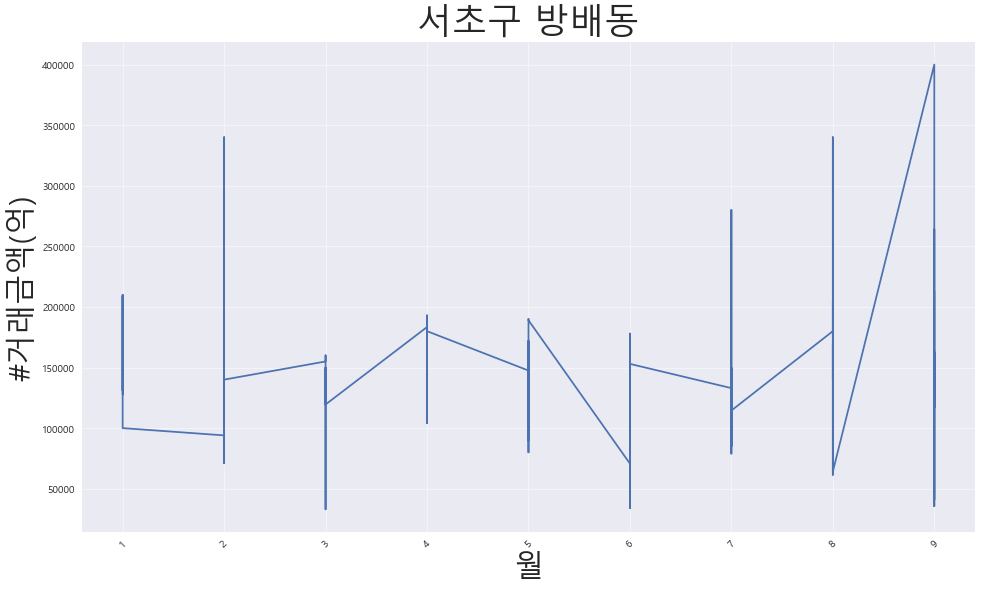

In [13]:
plt.figure(figsize=(16,9))
plt.plot(df_seocho['월'], df_seocho['매매가격'])
plt.xlabel('월', size=30)
plt.ylabel('#거래금액(억)', size=30)
plt.title('서초구 방배동', size=35)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

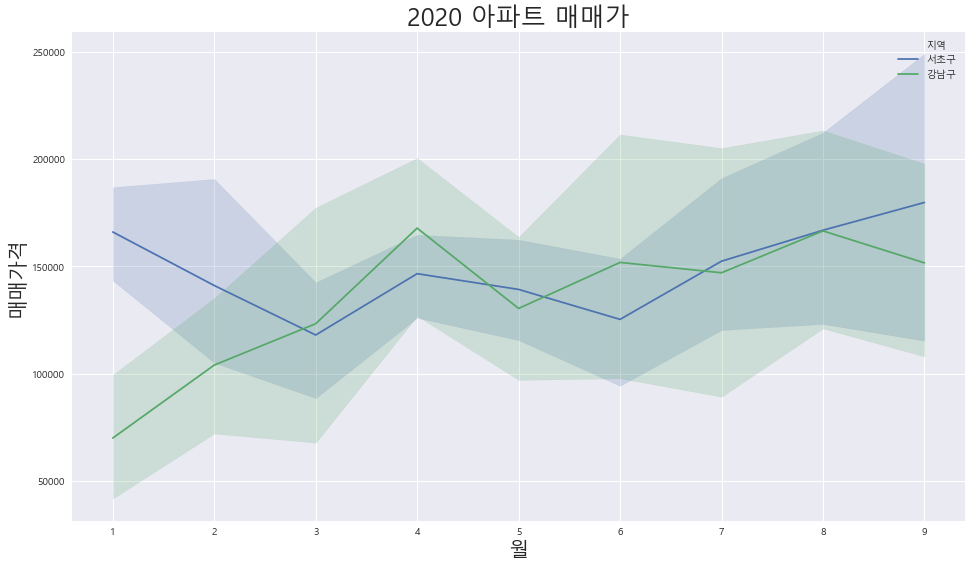

In [29]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df, x='월', y='매매가격', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('매매가격', size=20)
plt.title('2020 아파트 매매가', size=25)
plt.show()

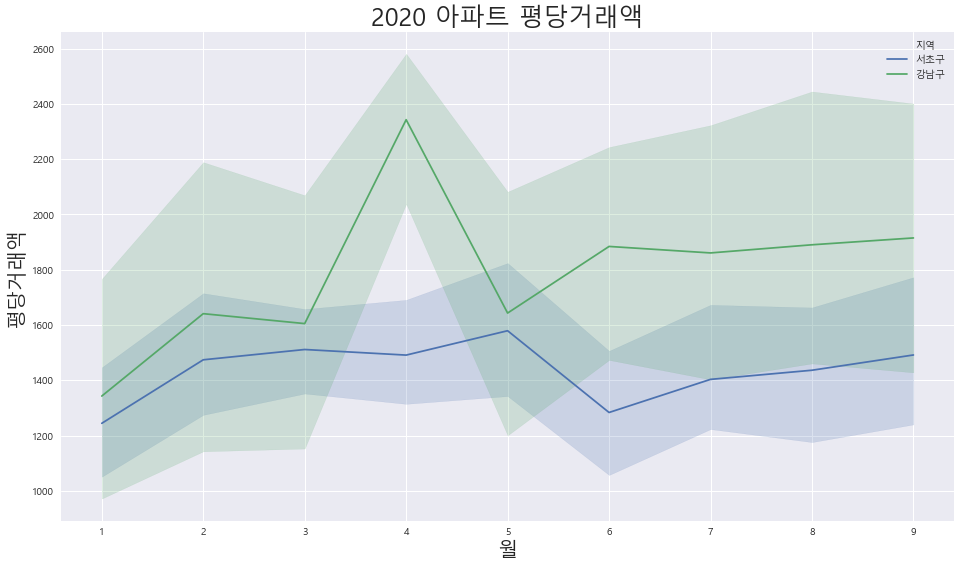

In [42]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df, x='월', y='평당거래액', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('평당거래액', size=20)
plt.title('2020 아파트 평당거래액', size=25)
plt.show()

In [43]:
df2=pd.read_csv('XML_Apart_data2.csv')

In [17]:
df2

,지역,동,월,일,매매가격,전용면적
0,서초구,방배동,1,3,161500,243.3400
1,서초구,방배동,1,4,174000,163.3600
2,서초구,방배동,1,5,135000,114.2800
3,서초구,방배동,1,6,220000,185.4600
4,서초구,방배동,1,10,280000,216.1500
...,...,...,...,...,...,...
175,강남구,역삼동,9,7,155000,59.8848
176,강남구,역삼동,9,7,205000,84.9910
177,강남구,역삼동,9,7,190000,80.8700
178,강남구,역삼동,9,7,135500,59.4000


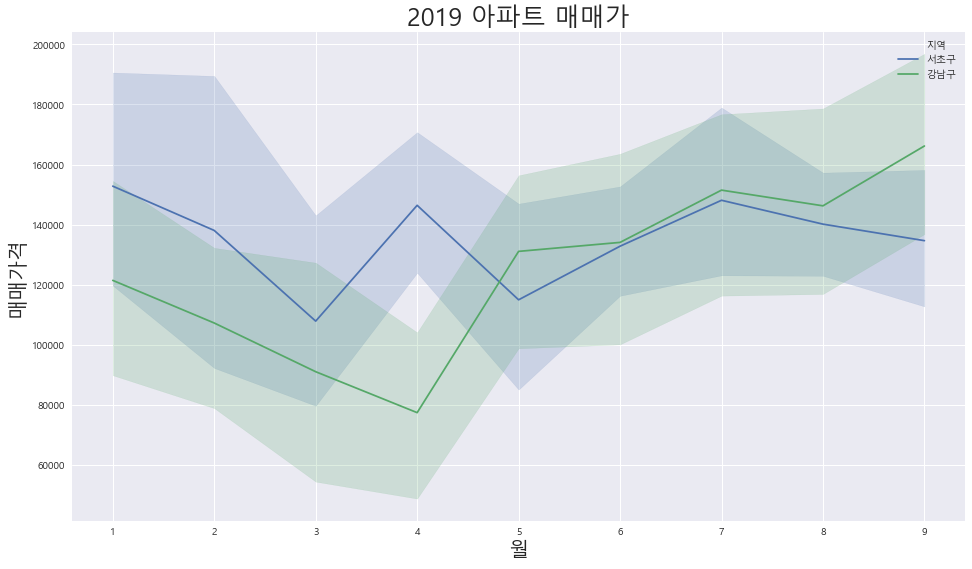

In [34]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df2, x='월', y='매매가격', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('매매가격', size=20)
plt.title('2019 아파트 매매가', size=25)
plt.show()

In [19]:
df2['평수']=df2['전용면적'].apply(lambda x: x / float(3.30578))
df2['평당거래액']=df2['매매가격'] / df['전용면적']

In [21]:
df2

,지역,동,월,일,매매가격,전용면적,평수,평당거래액
0,서초구,방배동,1,3,161500,243.3400,73.610464,1984.273252
1,서초구,방배동,1,4,174000,163.3600,49.416477,1430.502254
2,서초구,방배동,1,5,135000,114.2800,34.569754,552.825553
3,서초구,방배동,1,6,220000,185.4600,56.101737,1894.428658
4,서초구,방배동,1,10,280000,216.1500,65.385476,3296.444549
...,...,...,...,...,...,...,...,...
175,강남구,역삼동,9,7,155000,59.8848,18.115180,1265.822785
176,강남구,역삼동,9,7,205000,84.9910,25.709817,2432.368296
177,강남구,역삼동,9,7,190000,80.8700,24.463213,6726.616158
178,강남구,역삼동,9,7,135500,59.4000,17.968528,1595.995289


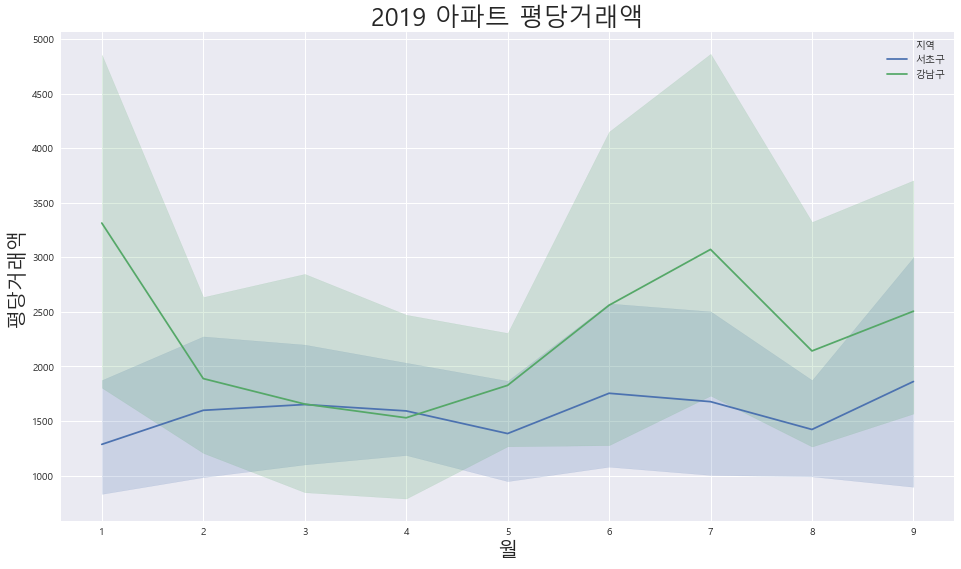

In [35]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df2, x='월', y='평당거래액', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('평당거래액', size=20)
plt.title('2019 아파트 평당거래액', size=25)
plt.show()

In [31]:
df3=pd.read_csv('XML_Apart_data3.csv')

In [32]:
df3

,지역,동,월,일,매매가격,전용면적
0,서초구,방배동,1,2,105000,59.9700
1,서초구,방배동,1,2,107400,59.9700
2,서초구,방배동,1,3,138000,155.4471
3,서초구,방배동,1,3,35000,29.6000
4,서초구,방배동,1,3,130500,127.6100
...,...,...,...,...,...,...
175,강남구,역삼동,9,5,155000,84.9700
176,강남구,역삼동,9,5,215000,144.6410
177,강남구,역삼동,9,5,150000,59.8848
178,강남구,역삼동,9,5,180000,84.9910


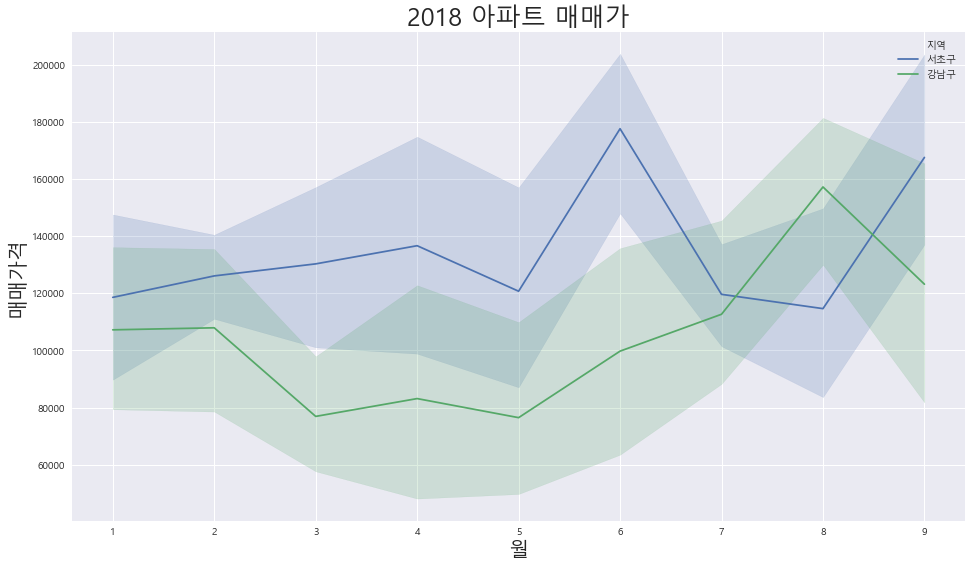

In [33]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df3, x='월', y='매매가격', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('매매가격', size=20)
plt.title('2018 아파트 매매가', size=25)
plt.show()

In [39]:
df3['평수']=df3['전용면적'].apply(lambda x: x / float(3.30578))
df3['평당거래액']=df3['매매가격'] / df['전용면적']

In [40]:
df3

,지역,동,월,일,매매가격,전용면적,평수,평당거래액
0,서초구,방배동,1,2,105000,59.9700,18.140953,1290.084777
1,서초구,방배동,1,2,107400,59.9700,18.140953,882.965185
2,서초구,방배동,1,3,138000,155.4471,47.022821,565.110565
3,서초구,방배동,1,3,35000,29.6000,8.954014,301.386377
4,서초구,방배동,1,3,130500,127.6100,38.602085,1536.378620
...,...,...,...,...,...,...,...,...
175,강남구,역삼동,9,5,155000,84.9700,25.703465,1265.822785
176,강남구,역삼동,9,5,215000,144.6410,43.753970,2551.020408
177,강남구,역삼동,9,5,150000,59.8848,18.115180,5310.486441
178,강남구,역삼동,9,5,180000,84.9910,25.709817,2120.141343


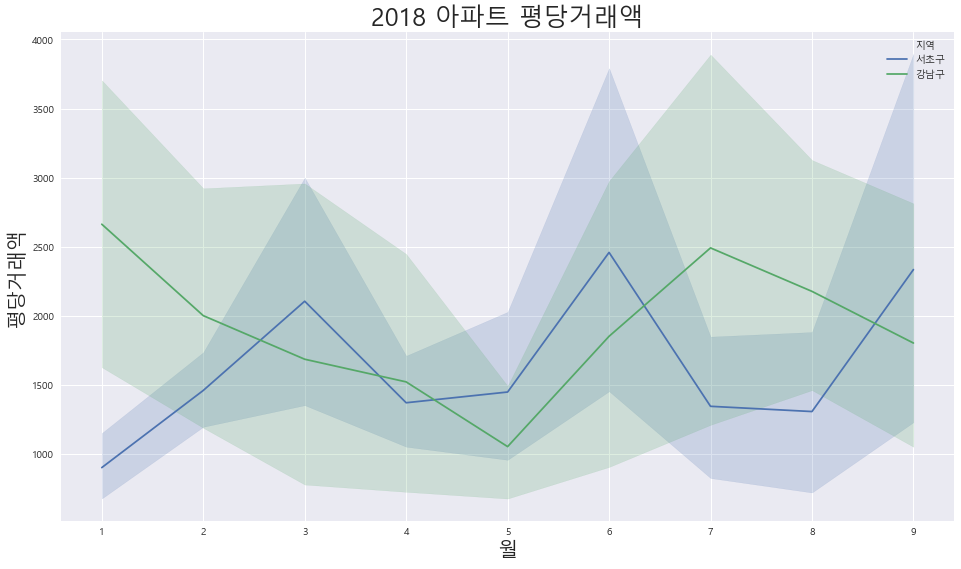

In [41]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df3, x='월', y='평당거래액', hue='지역')
plt.xlabel('월', size=20)
plt.ylabel('평당거래액', size=20)
plt.title('2018 아파트 평당거래액', size=25)
plt.show()